<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/LR%2BkNN%2BNB%2BSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"
df = pd.read_csv(DATA_PATH + "telecom_churn.csv")

df["International plan"] = pd.factorize(df["International plan"])[0]
df["Voice mail plan"] = pd.factorize(df["Voice mail plan"])[0]
df["Churn"] = df["Churn"].astype("int")
states = df["State"]
y = df["Churn"]
X=df.drop(["State", "Churn"], axis=1)

In [2]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))
 
 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')


In [3]:
#split data into 2 parts:test and train
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [ ]:
X

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,0,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,1,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,1,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,1,1,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

# **Logistic Regression**

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.873
Precision: 0.625
Recall: 0.11278195488721804


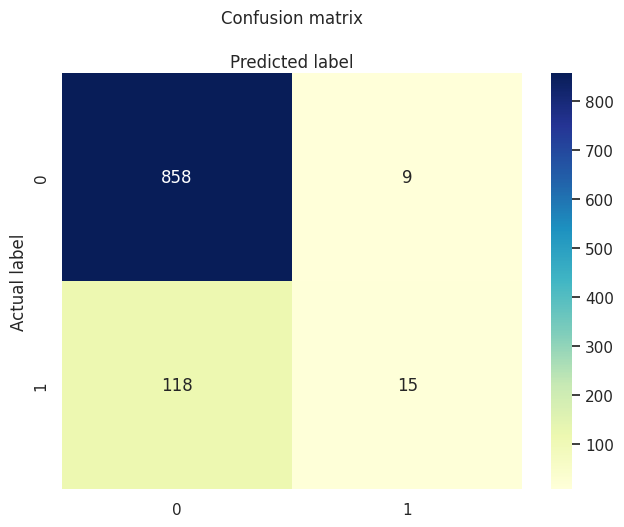

In [4]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
eval(y_test,y_pred)

In [5]:
#To get the coeffient
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.330509
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2314
Method:                           MLE   Df Model:                           18
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.2182
Time:                        03:39:12   Log-Likelihood:                -771.08
converged:                       True   LL-Null:                       -986.27
Covariance Type:            nonrobust   LLR p-value:                 4.144e-80
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -9.7729      1.278     -7.648      0.000     -12.277      

A) Which variables are significantly diffrent than 0  at 5% significant level?

Hypothesis  HO: Coeffienct is 0
            HA: Coeffient is different than 0
If alpha is smaller than significance level(5%), reject Ho and coeffient is different than 0.
If alpha is grater than significance level(5%),fail to reject Ho and 
coeffient is not different than 0.

International plan , voice mail plan, Total intl calls, Customer service calls 
have alpha value less than 0.05. For that resaon, coeffient is different than 0.


B)Among signicant variables, which one increases the probability of churn?

   ln(p/(1-p))=B+B1X1+B2X2+B3X3
   p is probability of success(1). In our case 1 is churn.
   If coeffient is positive(negative), it increases(decreases) the likelihood ratio and churn probability.
   International plan , voice mail plan,Customer service calls (Total intl calls) have positive(negative coeffient) and it increases(decreases) likelihood of churn.


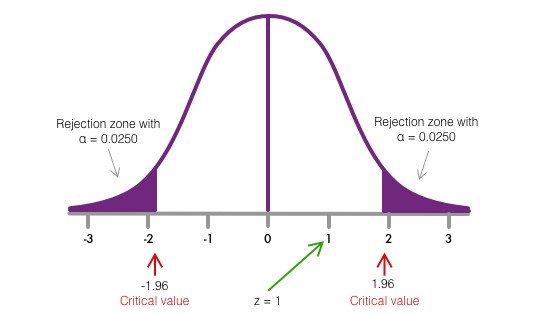

## **K-Nearest Neighbour- kNN**

Accuracy: 0.868
Precision: 0.5072463768115942
Recall: 0.2631578947368421


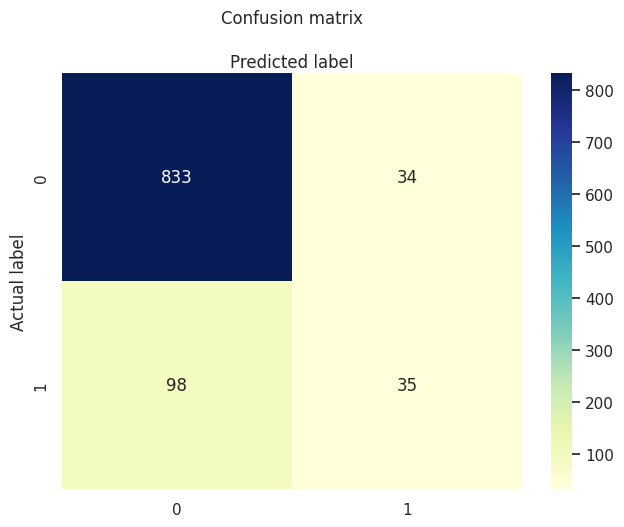

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors=3)
# fit the model with data
knn3.fit(X_train,y_train)

#
y_predKNN3=knn3.predict(X_test)
from sklearn import metrics

eval(y_test,y_predKNN3)

## **Choose k Based On CV**

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV, cross_val_score

knn_params = {"n_neighbors": range(1,20)}

knn_grid = GridSearchCV(knn, knn_params, cv=3)

knn_grid.fit(X_train, y_train)
knn_grid.best_params_

{'n_neighbors': 11}

Accuracy: 0.883
Precision: 0.7222222222222222
Recall: 0.19548872180451127


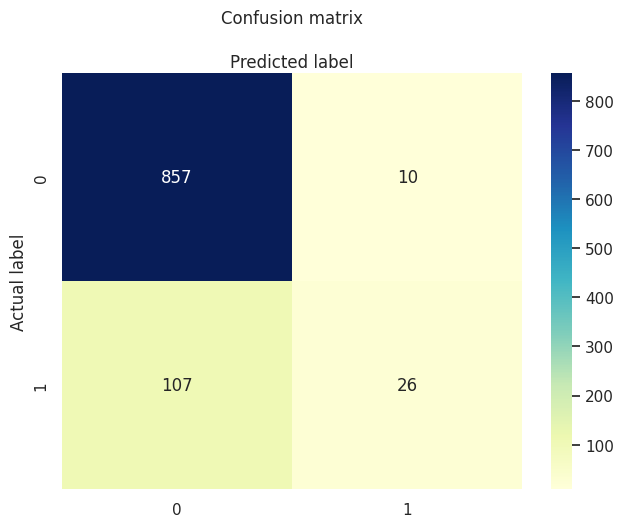

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knncv = KNeighborsClassifier(**knn_grid.best_params_)
# fit the model with data
knncv.fit(X_train,y_train)
#
y_predknncv=knncv.predict(X_test)
eval(y_test,y_predknncv)


# **Naive Bayes**

Accuracy: 0.863
Precision: 0.4864864864864865
Recall: 0.5413533834586466


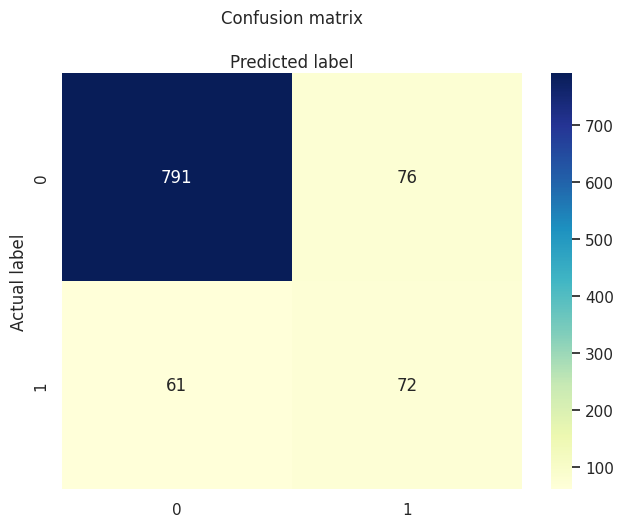

In [9]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)
y_predNB=model.predict(X_test)
eval(y_test,y_predNB)

# **SVM with default parameters**

Accuracy: 0.867
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


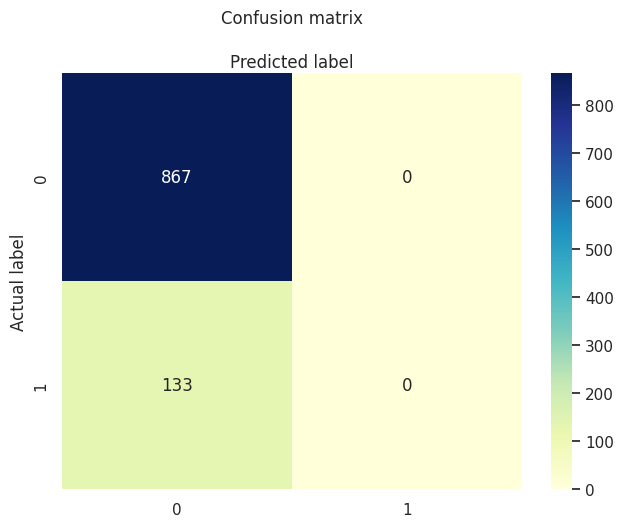

In [10]:
from sklearn.svm import SVC 
sv =SVC()
sv.fit(X_train,y_train)
y_predsv=sv.predict(X_test)
from sklearn import metrics

eval(y_test,y_predsv)

In [11]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 7.8 MB/s eta 0:00:00


### **Support Vector with Parameter Optimization**

It takes too much time to optimize

In [21]:
from sklearn.svm import SVC 
import optuna as op
from sklearn.metrics import accuracy_score
#split data into 2 parts:test and train
from sklearn.model_selection import StratifiedKFold, train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_train, y_train, test_size=0.3, random_state=17
) 
def objective(trial):

   kernel=trial.suggest_categorical('kernel',['rbf','poly','linear','sigmoid'])
   c=trial.suggest_float("C",0.1,3.0,log=True)
   gamma=trial.suggest_categorical('gamma',['auto','scale'])
   degree=trial.suggest_int("degree",1,3,log=True)
   model =SVC(kernel=kernel,gamma=gamma,degree=degree,C=c)
   model.fit(X_train2,y_train2)
   accuracy = accuracy_score(model.predict(X_test2),y_test2)
   return accuracy
#optuna study record
study = op.create_study(direction="maximize")
study.optimize(objective, n_trials=5,n_jobs=-1)
print(study.best_trials)

[I 2023-03-30 03:53:16,850] A new study created in memory with name: no-name-27af9730-f40c-4d5b-8cca-79e324a235cb
[I 2023-03-30 03:53:17,220] Trial 1 finished with value: 0.8528571428571429 and parameters: {'kernel': 'sigmoid', 'C': 0.32164244367819006, 'gamma': 'scale', 'degree': 1}. Best is trial 1 with value: 0.8528571428571429.
[I 2023-03-30 03:53:18,011] Trial 2 finished with value: 0.8528571428571429 and parameters: {'kernel': 'sigmoid', 'C': 0.39402154474980317, 'gamma': 'auto', 'degree': 1}. Best is trial 1 with value: 0.8528571428571429.
[I 2023-03-30 03:53:18,187] Trial 3 finished with value: 0.8528571428571429 and parameters: {'kernel': 'sigmoid', 'C': 0.10482982035014193, 'gamma': 'auto', 'degree': 3}. Best is trial 1 with value: 0.8528571428571429.
[I 2023-03-30 03:53:18,563] Trial 4 finished with value: 0.8528571428571429 and parameters: {'kernel': 'rbf', 'C': 1.0458944777779748, 'gamma': 'scale', 'degree': 1}. Best is trial 1 with value: 0.8528571428571429.
[I 2023-03-30

[FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.8528571428571429], datetime_start=datetime.datetime(2023, 3, 30, 3, 53, 16, 860476), datetime_complete=datetime.datetime(2023, 3, 30, 3, 54, 30, 952932), params={'kernel': 'linear', 'C': 1.1850790159628448, 'gamma': 'auto', 'degree': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'kernel': CategoricalDistribution(choices=('rbf', 'poly', 'linear', 'sigmoid')), 'C': FloatDistribution(high=3.0, log=True, low=0.1, step=None), 'gamma': CategoricalDistribution(choices=('auto', 'scale')), 'degree': IntDistribution(high=3, log=True, low=1, step=1)}, trial_id=0, value=None), FrozenTrial(number=1, state=TrialState.COMPLETE, values=[0.8528571428571429], datetime_start=datetime.datetime(2023, 3, 30, 3, 53, 16, 873252), datetime_complete=datetime.datetime(2023, 3, 30, 3, 53, 17, 220316), params={'kernel': 'sigmoid', 'C': 0.32164244367819006, 'gamma': 'scale', 'degree': 1}, user_attrs={}, system_attrs={}, interme

In [ ]:
print(study.best_params)

{'kernel': 'linear', 'C': 2.797224576635671, 'gamma': 'scale', 'degree': 3}


[I 2023-03-30 03:43:09,118] Trial 3 finished with value: 0.8528571428571429 and parameters: {'kernel': 'linear', 'C': 1.718143306950425, 'gamma': 'scale', 'degree': 3}. Best is trial 1 with value: 0.8528571428571429.


Accuracy: 0.878
Precision: 0.6341463414634146
Recall: 0.19548872180451127


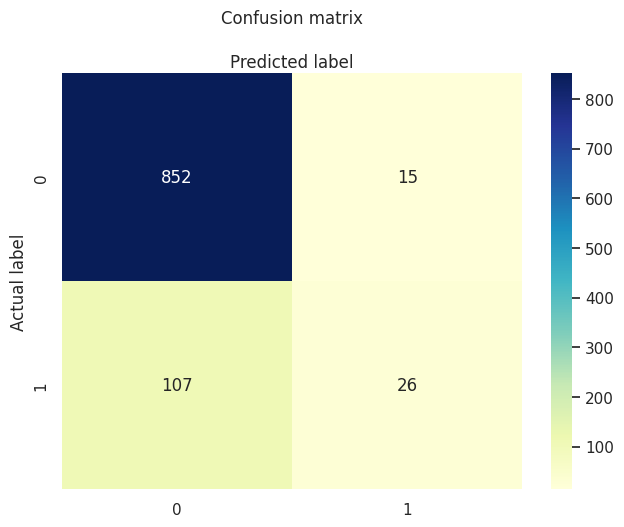

In [13]:
parameters={'kernel': 'linear', 'C': 2.797224576635671, 'gamma': 'scale', 'degree': 3}
from sklearn.svm import SVC 
sv =SVC(**parameters)
sv.fit(X_train,y_train)
y_predsv=sv.predict(X_test)
from sklearn import metrics

eval(y_test,y_predsv)

## **Boosting**

In [ ]:
import optuna

import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):
    x, y = X_train,y_train

    classifier_name = trial.suggest_categorical("classifier", ["Random Forest","XGBoost", "LightGBM","GradientBoostingClassifier" ])
    if classifier_name == "Random Forest":
         from sklearn.ensemble import RandomForestClassifier
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = sklearn.ensemble.RandomForestClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )
        
         

    elif classifier_name == "XGBoost":
         from xgboost import XGBClassifier
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = XGBClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )
        
         

    elif classifier_name == "LightGBM":
         import lightgbm as lgb
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = lgb.LGBMClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )
        
       
       
    else:
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = sklearn.ensemble.GradientBoostingClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )
        
         

    accuracy=sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3).mean()
   
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=20)
    print(study.best_trial)
    print(study.best_params)

[I 2022-04-01 12:39:50,792] A new study created in memory with name: no-name-ed24e304-6b87-4db2-abe2-61233ac6a239
[I 2022-04-01 12:39:53,916] Trial 0 finished with value: 0.9519955136921717 and parameters: {'classifier': 'LightGBM', 'max_depth': 12, 'max_features': 12}. Best is trial 0 with value: 0.9519955136921717.
[I 2022-04-01 12:39:54,073] Trial 1 finished with value: 0.9284197896023089 and parameters: {'classifier': 'LightGBM', 'max_depth': 2, 'max_features': 3}. Best is trial 0 with value: 0.9519955136921717.
[I 2022-04-01 12:39:55,022] Trial 2 finished with value: 0.9481356126600343 and parameters: {'classifier': 'XGBoost', 'max_depth': 6, 'max_features': 18}. Best is trial 0 with value: 0.9519955136921717.
[I 2022-04-01 12:39:55,407] Trial 3 finished with value: 0.95027951197617 and parameters: {'classifier': 'LightGBM', 'max_depth': 9, 'max_features': 12}. Best is trial 0 with value: 0.9519955136921717.
[I 2022-04-01 12:39:55,598] Trial 4 finished with value: 0.94170446612606

FrozenTrial(number=16, values=[0.9524239627067391], datetime_start=datetime.datetime(2022, 4, 1, 12, 40, 37, 815057), datetime_complete=datetime.datetime(2022, 4, 1, 12, 40, 38, 994665), params={'classifier': 'LightGBM', 'max_depth': 18, 'max_features': 11}, distributions={'classifier': CategoricalDistribution(choices=('Random Forest', 'XGBoost', 'LightGBM', 'GradientBoostingClassifier')), 'max_depth': IntUniformDistribution(high=18, low=2, step=1), 'max_features': IntUniformDistribution(high=18, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=16, state=TrialState.COMPLETE, value=None)
{'classifier': 'LightGBM', 'max_depth': 18, 'max_features': 11}


[LightGBM] [Warning] Unknown parameter: max_features
Accuracy: 0.959
Precision: 0.9339622641509434
Recall: 0.7443609022556391


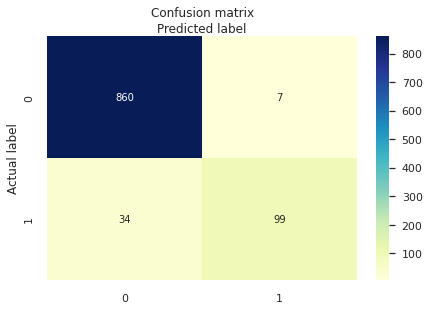

In [ ]:
params={ 'max_depth': 18, 'max_features': 11}
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(random_state=17,**params)
lgbm.fit(X_train, y_train)
# make predictions for test data
y_predlgbm = lgbm.predict(X_test)
eval(y_test, y_predlgbm)

### Automatic Machnile Learning (Auto ML)

In [ ]:
!pip install pycaret

  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
result = pd.concat([X_train, y_train], axis=1)
result

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1069,22,510,0,1,0,160.4,108,27.27,218.1,88,18.54,192.9,115,8.68,12.5,4,3.38,1,0
1582,86,510,0,1,0,150.5,92,25.59,120.3,95,10.23,271.2,96,12.20,9.0,2,2.43,1,0
2444,121,415,0,0,31,263.1,70,44.73,279.3,118,23.74,127.1,143,5.72,9.7,4,2.62,5,0
3196,124,510,0,1,0,169.3,108,28.78,178.6,91,15.18,242.3,82,10.90,12.2,3,3.29,1,0
267,119,408,0,1,0,138.3,89,23.51,170.5,78,14.49,263.9,98,11.88,13.5,6,3.65,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,21,415,0,1,0,146.0,78,24.82,109.7,79,9.32,247.4,108,11.13,6.8,7,1.84,0,0
1414,182,415,0,1,0,176.1,90,29.94,174.9,106,14.87,234.7,134,10.56,9.7,4,2.62,1,0
2191,113,415,0,1,0,90.6,130,15.40,170.6,100,14.50,137.4,74,6.18,5.4,9,1.46,1,0
3313,127,408,0,1,0,102.8,128,17.48,143.7,95,12.21,191.4,97,8.61,10.0,5,2.70,1,0


In [ ]:
#!pip install --upgrade numpy
from pycaret.classification import *
s = setup(data = result, target = 'Churn', session_id=123)


,Description,Value
0,session_id,123
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2333, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9351,0.9007,0.6922,0.8778,0.7693,0.7324,0.7422,0.562
lightgbm,Light Gradient Boosting Machine,0.9308,0.8828,0.6414,0.8992,0.7411,0.7030,0.7206,0.113
rf,Random Forest Classifier,0.9143,0.9030,0.5049,0.9179,0.6434,0.6004,0.6389,0.621
dt,Decision Tree Classifier,0.9039,0.8160,0.6878,0.6974,0.6907,0.6339,0.6352,0.033
et,Extra Trees Classifier,0.8879,0.8888,0.3798,0.8247,0.5038,0.4527,0.5033,0.527
ada,Ada Boost Classifier,0.8733,0.8623,0.4268,0.6573,0.5128,0.4440,0.4602,0.269
lr,Logistic Regression,0.8530,0.8700,0.2935,0.5735,0.3811,0.3085,0.3337,0.523
lda,Linear Discriminant Analysis,0.8512,0.8750,0.4142,0.5327,0.4634,0.3792,0.3845,0.027
ridge,Ridge Classifier,0.8445,0.0000,0.2735,0.5249,0.3533,0.2752,0.2970,0.017
dummy,Dummy Classifier,0.8432,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.014


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9512,0.9512,0.8077,0.8750,0.8400,0.8113,0.8122
1,0.9268,0.8963,0.6154,0.8889,0.7273,0.6866,0.7021
2,0.9390,0.9295,0.6923,0.9000,0.7826,0.7478,0.7566
3,0.9448,0.8817,0.6800,0.9444,0.7907,0.7599,0.7735
4,0.9755,0.9545,0.8400,1.0000,0.9130,0.8989,0.9035
5,0.9509,0.9554,0.7600,0.9048,0.8261,0.7978,0.8019
6,0.9264,0.8925,0.7200,0.7826,0.7500,0.7069,0.7078
7,0.9264,0.8338,0.5769,0.9375,0.7143,0.6748,0.7010
8,0.9325,0.8793,0.6154,0.9412,0.7442,0.7073,0.7285


Accuracy: 0.952
Precision: 0.9207920792079208
Recall: 0.6992481203007519


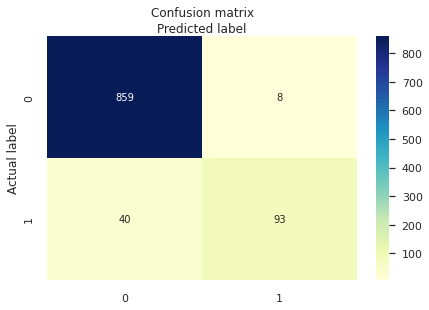

In [ ]:
tuned2 = tune_model(best_model)
tuned_predictions = predict_model(tuned2, data=X_test)
tuned_predictions.head()
eval(y_test,tuned_predictions['Label'])

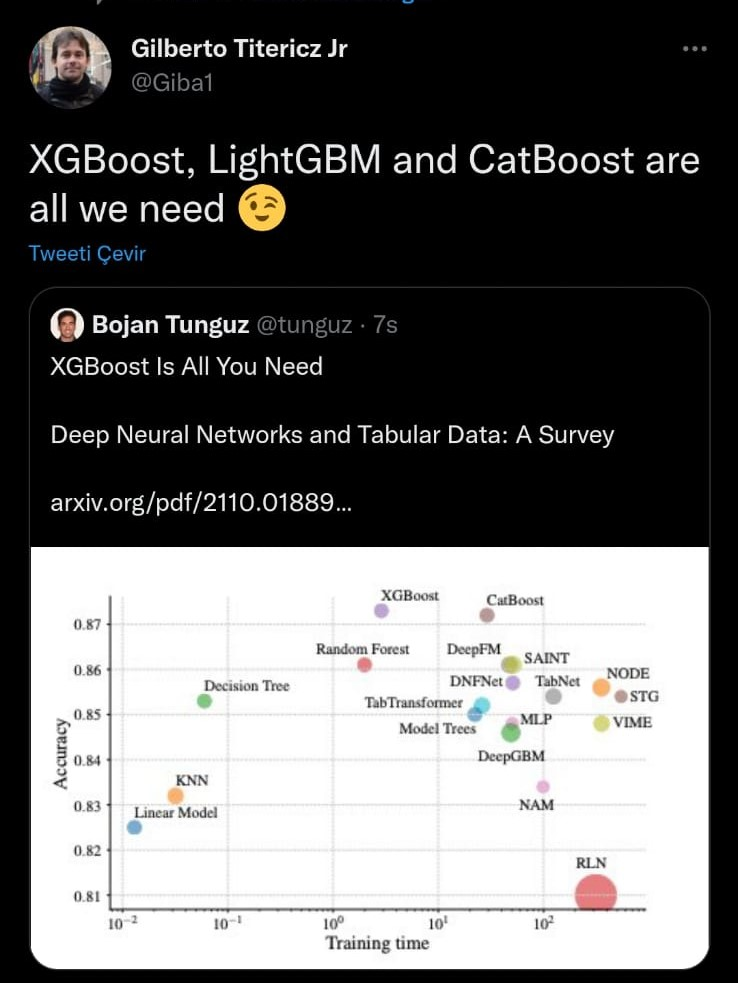

For further reference:

https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d
